<a href="https://colab.research.google.com/github/linhlaogia7895/Colab-Project/blob/linh/Nexflix%20shows%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'drive/MyDrive/Colab Notebooks'
import pandas as pd
import statistics as st
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

/content/drive/MyDrive/Colab Notebooks


In [ ]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

FileNotFoundError: ignored

In [ ]:

country = netflix['country'].str.split(', ', expand=True)
a = country.stack().value_counts()
plt.pie(a[:10], labels = a.keys()[:10], startangle = 270, autopct='%1.1f%%')
plt.tight_layout()
plt.title('Percentage muber of show in top 10 country')
plt.show()


NameError: ignored

question 1:	Which attributes affect the quantity of shows released by a country?

In [ ]:
b = np.sum(a[:10]) / np.sum(a) * 100
print(round(b, 2),'%')

75.42 %


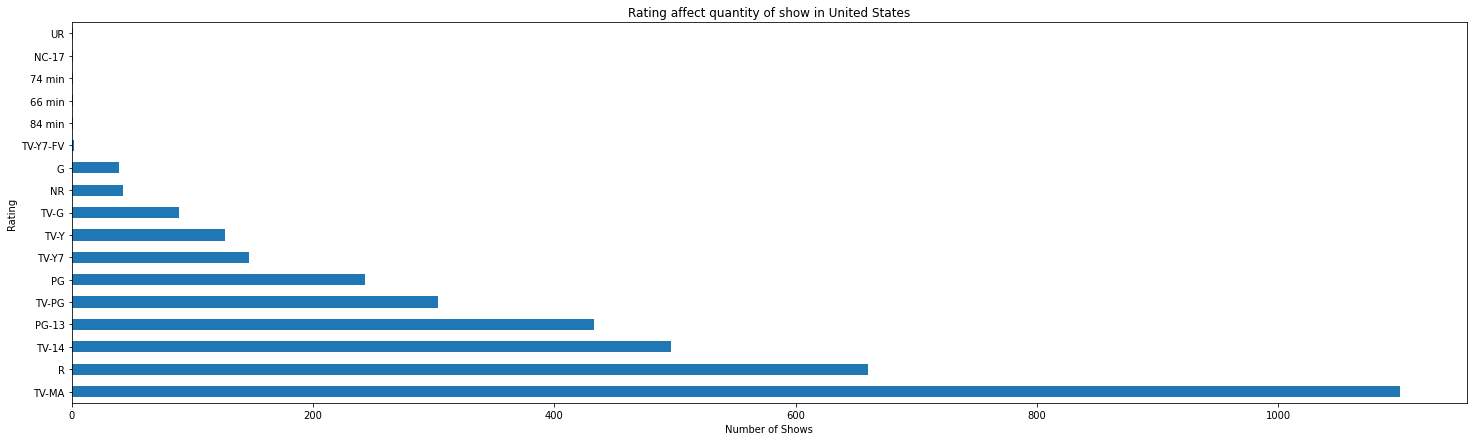

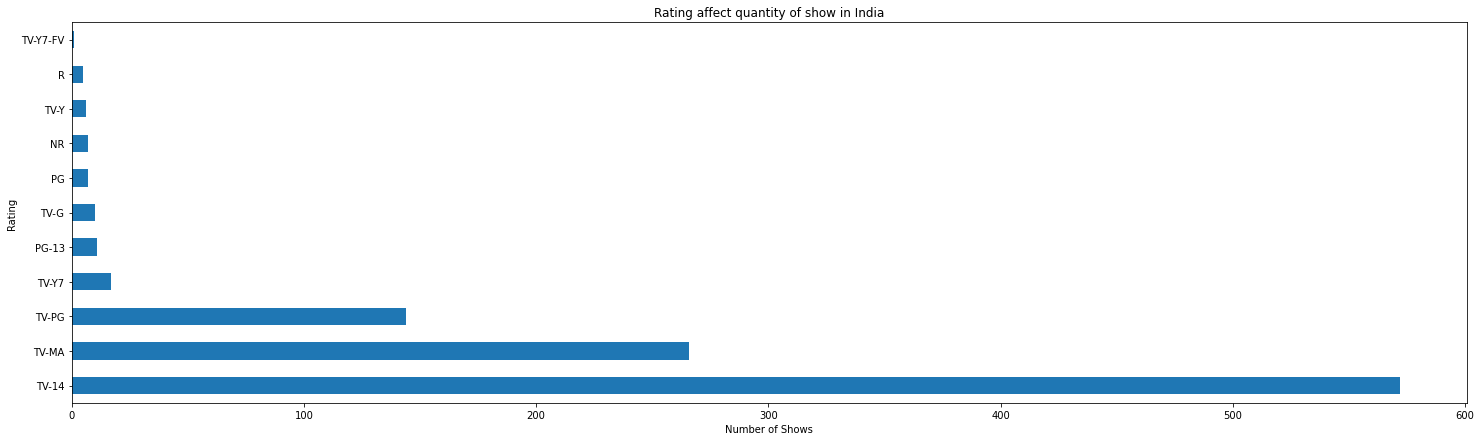

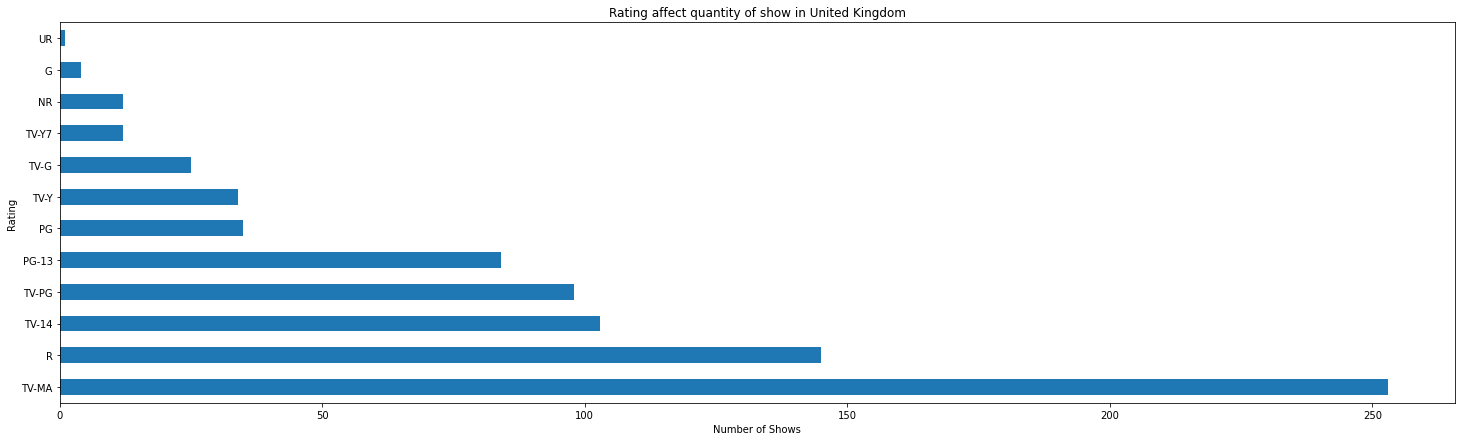

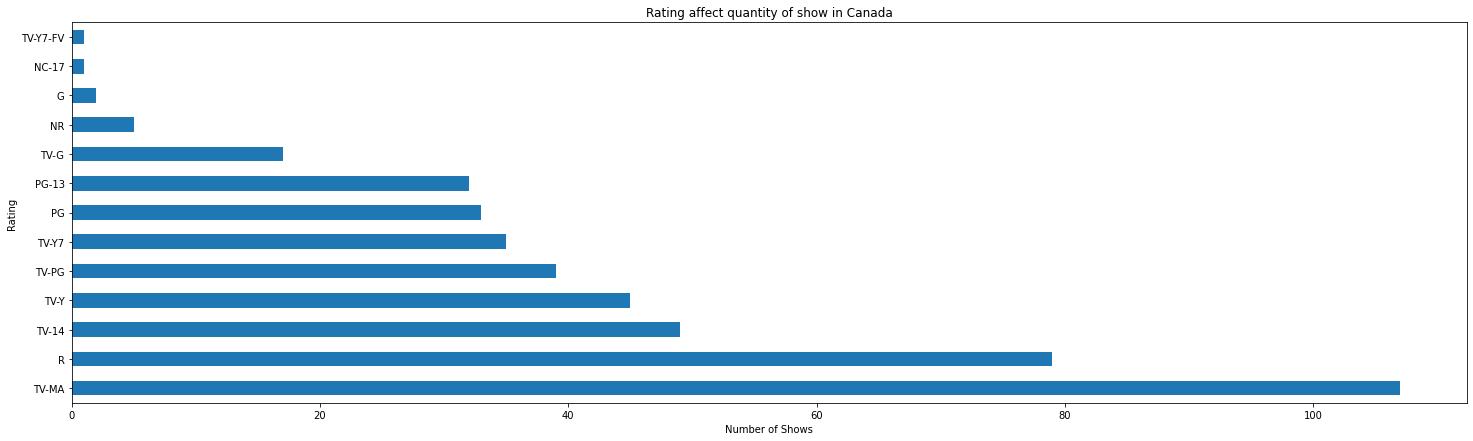

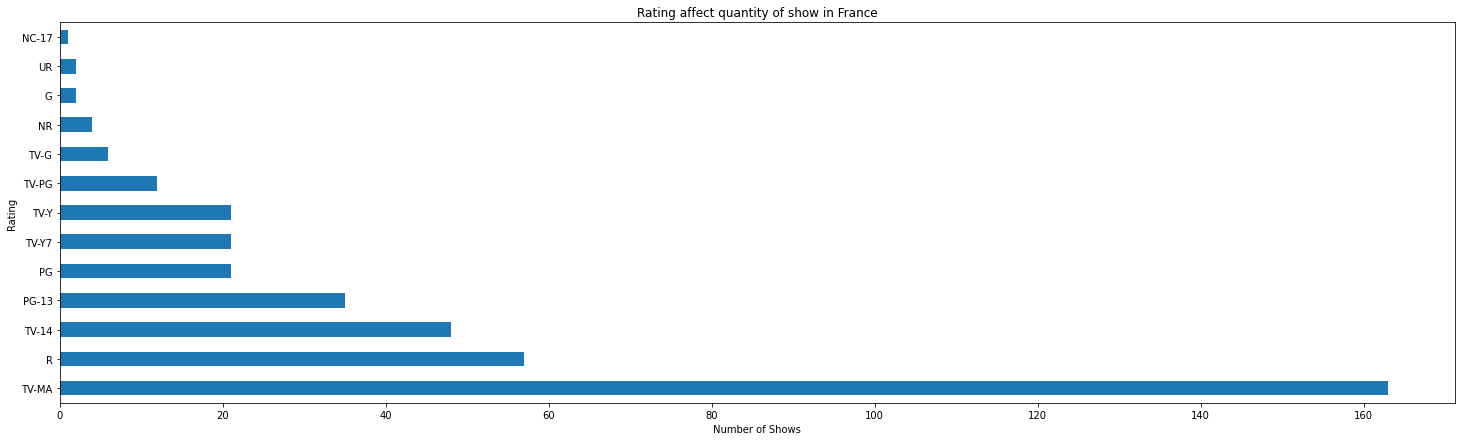

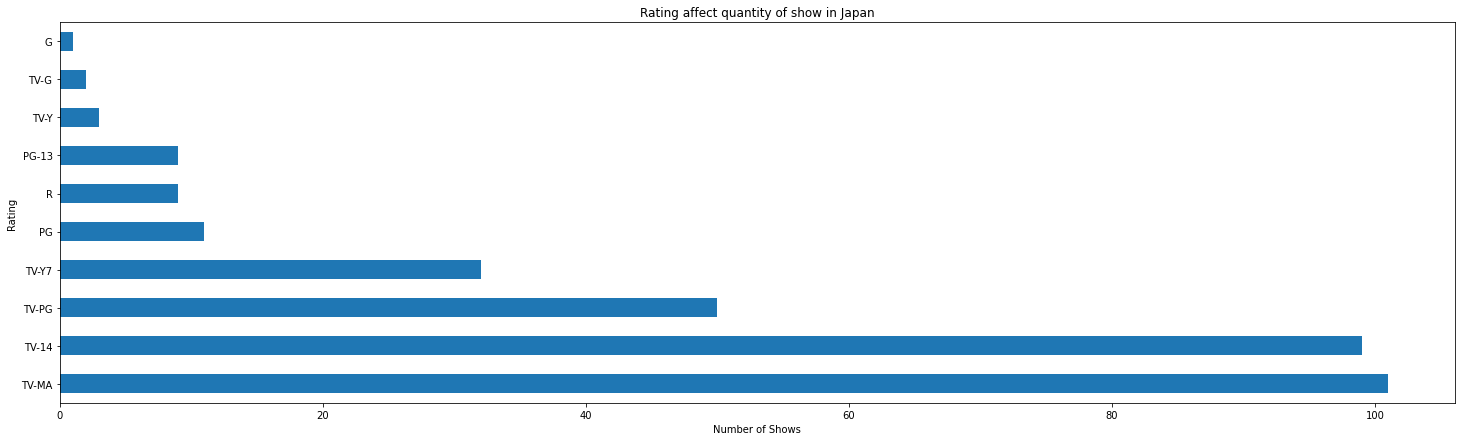

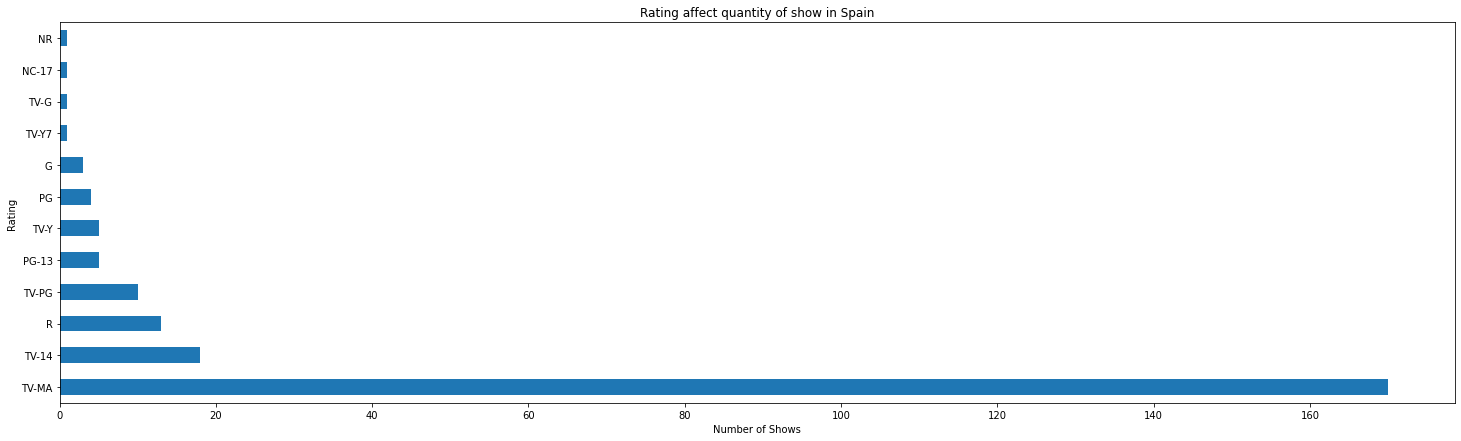

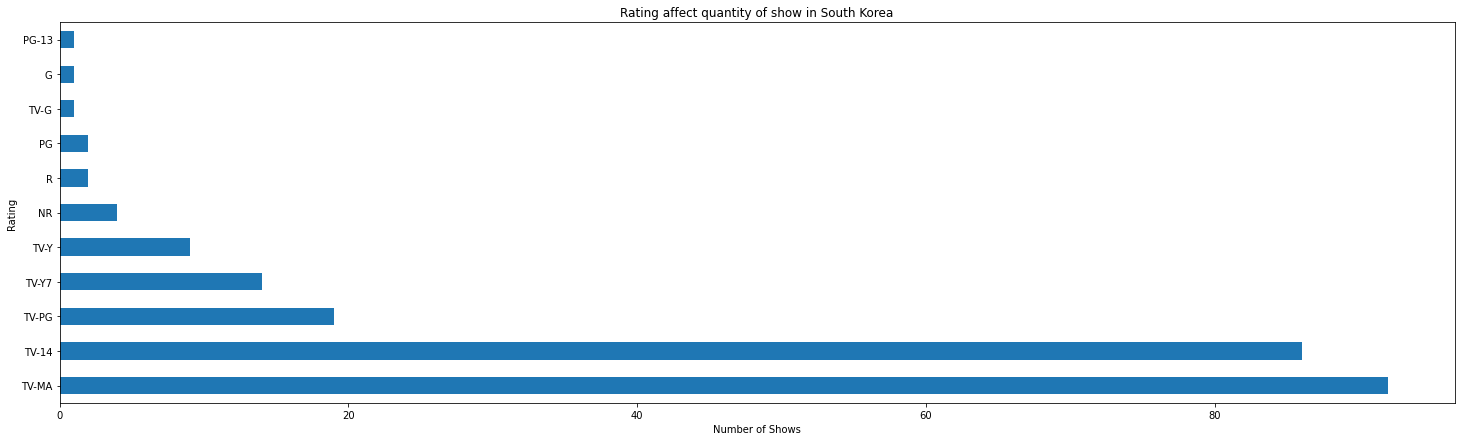

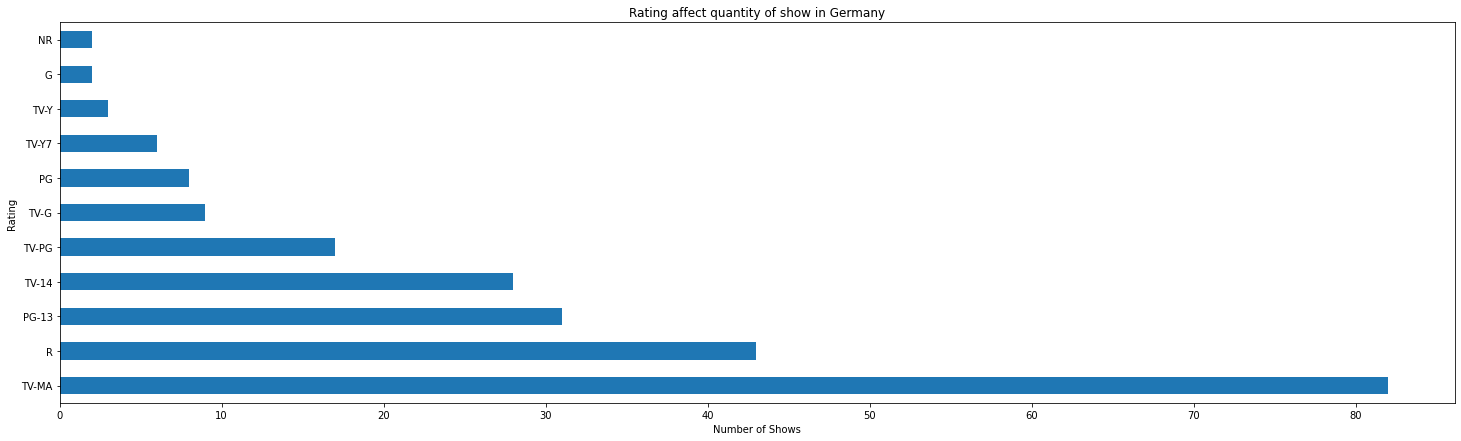

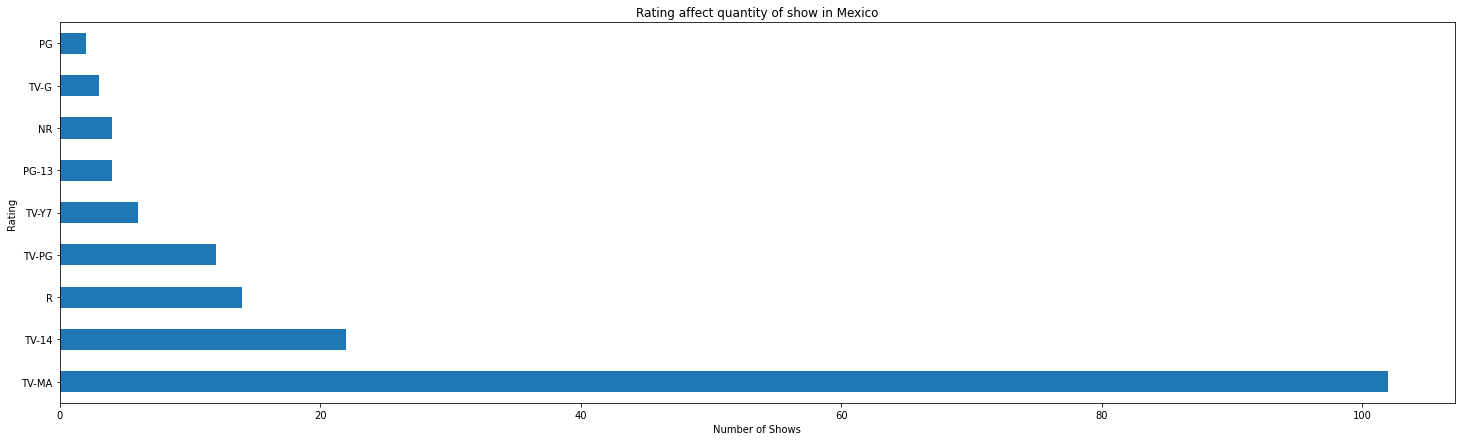

In [ ]:
countries = a.keys()[:10]

temp = netflix[netflix['country'].notnull()]
for x in countries:
  c = temp[temp['country'].str.contains(str(x))]
  z = c['rating'].value_counts()
  z.plot(kind='barh')
  plt.title('Rating affect quantity of show in '+str(x))
  plt.xlabel("Number of Shows")
  plt.ylabel("Rating")
  plt.show()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64


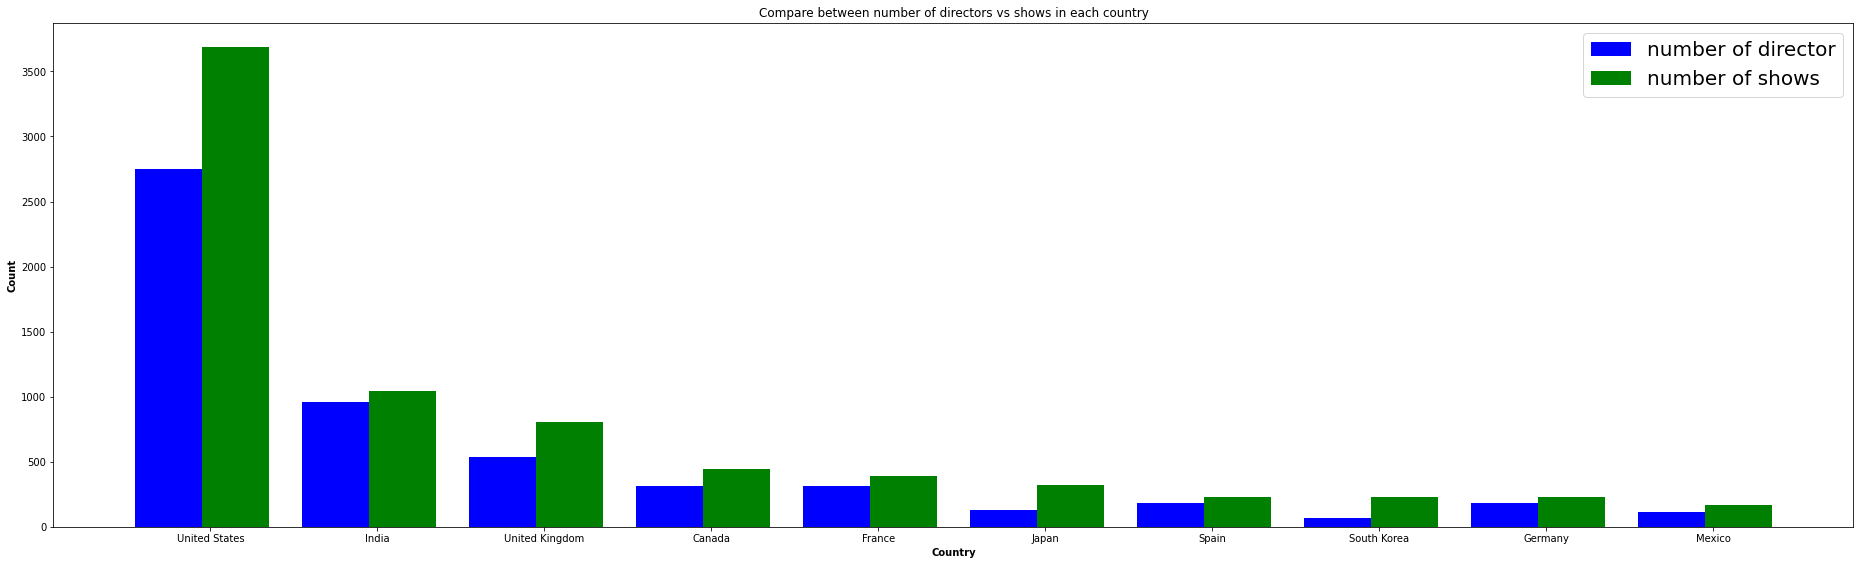

In [ ]:
director = []
count = a[:10]
print(count)
for x in countries:
  c = temp[temp['country'].str.contains(str(x))]
  z = c['director'].value_counts().sum()
  director.append(z)
X = np.arange(len(director))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00,  director, color = 'b', width = 0.4,label ='number of director')
ax.bar(X+0.4, count, color = 'g', width = 0.4,label ='number of shows')
plt.xlabel('Country', fontweight ='bold', fontsize = 10)
plt.ylabel('Count', fontweight ='bold', fontsize = 10)
plt.xticks([r+0.25 for r in X], countries)
plt.legend(fontsize = 20)
plt.title('Compare between number of directors vs shows in each country')
plt.show()


question 3: Since the list contains shows released over the span of 30 years, in which years were the most number of shows released?

In [ ]:
# number of shows released per year

shows = data[data.type == "SHOW"]

shows_per_year = shows.release_year.value_counts()
shows_per_year = pd.DataFrame(shows_per_year)

shows_per_year.rename(columns = {'release_year':'total_shows'}, inplace = True)
plt.figure(figsize=(10, 9))
sns.lineplot(data= shows_per_year)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()


NameError: ignored

In [ ]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= shows_per_year)
plt.title('Netflix´s shows release date (2000-2021)')
plt.xlim(2000, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

In [ ]:

max_shows = max(shows_per_year.total_shows)


year_with_max_shows= shows_per_year.index[shows_per_year['total_shows'] == max_shows].tolist()

print (f' Most Netflix´s shows were released on: {year_with_max_shows} with a total of {max_shows} shows')